In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_trainvalidation, X_test, y_trainvalidation, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_trainvalidation.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [4]:
score_list =[]

In [5]:
C_range = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
for c in C_range:
    clf = svm.SVC(kernel='linear' , C = c)
    cross_val_result = cross_val_score(clf,X_trainvalidation, y_trainvalidation, cv=10)
    cross_val_result.mean()
    score_list.append(cross_val_result.mean())
    #print(str(c) + ' : ' + str(cross_val_result.mean()))

In [6]:
score_list

[0.9583333333333334,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333334,
 0.9583333333333334,
 0.95,
 0.9333333333333332,
 0.9333333333333332]

Text(0, 0.5, 'Accuracy')

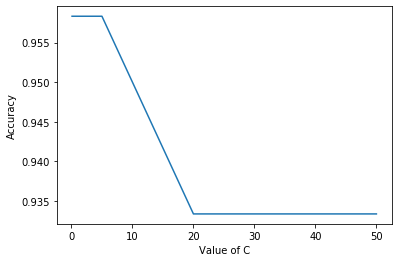

In [7]:
plt.plot(C_range, score_list)
plt.xlabel('Value of C')
plt.ylabel('Accuracy')

The result shows that C=[0.1, 0.5, 1, 2, 5] has the same accuracy.
By comparing the speed of convergence, we know C = 0.1 is quicker. So the best C is 0.1.

In [8]:
best_C = np.argmax(score_list)
C_val = C_range[best_C]
clf = svm.SVC(kernel='linear', C=C_val)
clf.fit(X_trainvalidation, y_trainvalidation)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
# return mean accuracy
clf.score(X_test, y_test)

1.0

Answer: the plot image is aboved. The best C is 0.1. The test accuray is 1.0